In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')
    
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
kospi_200_items = pd.read_excel('./null_deleted_dataset.xlsx')

In [4]:
def data_sp(data):
    com_name_set = list(set(data.Name))
    
    ## 18년도 3,6월 이전 이후로 나누기
    train_set = pd.DataFrame()
    test_set = pd.DataFrame()
    for i in range(len(com_name_set)):
        sub_set = data[ data.Name == com_name_set[i]]
        train_set = train_set.append(sub_set[:-3])
        test_set = test_set.append(sub_set[-3:])
    return train_set , test_set

In [5]:
train,test = data_sp(kospi_200_items)

In [6]:
print(train.shape,test.shape)

(1253, 53) (444, 53)


In [7]:
len(test['3개월 수익률(2)'][test['3개월 수익률(2)']==0])/len(test['3개월 수익률(2)'])

0.6824324324324325

In [8]:
kospi_200_items.columns

Index(['부채비율(%)', '매출액증가율(전년동기)(%)', '매출총이익증가율(전년동기)(%)', '영업이익증가율(전년동기)(%)',
       '당기순이익증가율(전년동기)(%)', '총포괄이익증가율(전년동기)(%)', 'EBITDA증가율(전년동기)(%)',
       '총자산증가율(전년동기)(%)', '총부채증가율(전년동기)(%)', '총자본증가율(전년동기)(%)',
       'EPS증가율(전년동기)(%)', 'BPS증가율(전년동기)(%)', 'ROA(총포괄이익)(%)', 'ROE(당기순이익)(%)',
       '총자산회전율(회)', '현금및현금성자산구성비율(%)', '차입부채/EBITDA(배)', 'EBITDA(천원)',
       'CFPS(원)', 'P/EBITDAPS(배)', '변동성 (20일)', '거래량 (20일 평균)(주)',
       '외국인보유비중(보통+우선)(%)', '공매도거래량 (20일)(주)', '순매수수량(개인)(20일합산)(주)',
       '순매수수량(기관계)(20일합산)(주)', '순매수수량(외국인계)(20일합산)(주)', 'PER(IFRS-연결)',
       'PBR(IFRS-연결)', 'PSR(IFRS-연결)', '부채비율(%)변화율', 'ROA(총포괄이익)(%)변화율',
       'ROE(당기순이익)(%)변화율', '총자산회전율(회)변화율', '현금및현금성자산구성비율(%)변화율',
       '차입부채/EBITDA(배)변화율', 'EBITDA(천원)변화율', 'CFPS(원)변화율', 'P/EBITDAPS(배)변화율',
       '변동성 (20일)변화율', '거래량 (20일 평균)(주)변화율', '외국인보유비중(보통+우선)(%)변화율',
       '공매도거래량 (20일)(주)변화율', '순매수수량(개인)(20일합산)(주)변화율',
       '순매수수량(기관계)(20일합산)(주)변화율', '순매수수량(외국인계)(20일합산)(주)변화율',
       'PER(IFRS-연결)변화율',

In [71]:
list(set(kospi_200_items.Name))

['영원무역',
 '팜스코',
 'KCC',
 'S-Oil',
 '빙그레',
 '한온시스템',
 '삼양사',
 '한국단자',
 '현대건설',
 '코스맥스',
 '보령제약',
 'LG상사',
 '쌍용차',
 '쿠쿠홀딩스',
 '후성',
 '에스원',
 '한화에어로스페이스',
 'CJ제일제당',
 'LIG넥스원',
 '아이에스동서',
 '한국콜마',
 '삼성중공업',
 '현대미포조선',
 '효성',
 '이노션',
 '휴켐스',
 '오리온홀딩스',
 '롯데정밀화학',
 '삼성SDI',
 '롯데쇼핑',
 'SBS',
 '만도',
 '세아베스틸',
 '현대글로비스',
 '두산밥캣',
 'S&T모티브',
 'SK네트웍스',
 'SK',
 'LG하우시스',
 '롯데케미칼',
 '한솔케미칼',
 '영진약품',
 '한국쉘석유',
 '동아에스티',
 '현대제철',
 'LG화학',
 'LG전자',
 '삼성엔지니어링',
 '동서',
 'SK하이닉스',
 'LS산전',
 '대상',
 '한라홀딩스',
 'AK홀딩스',
 '코웨이',
 '현대로템',
 '한섬',
 '현대리바트',
 '현대중공업',
 '유니드',
 'POSCO',
 '태광산업',
 'LG디스플레이',
 '삼양홀딩스',
 'CJ대한통운',
 '한진중공업',
 '일진머티리얼즈',
 '신세계',
 'SK텔레콤',
 'SPC삼립',
 '한샘',
 '두산인프라코어',
 'LG이노텍',
 '현대위아',
 'SK디스커버리',
 'GS리테일',
 '현대차',
 '영풍',
 '대림산업',
 '동국제강',
 '동원F&B',
 'HDC',
 '한일홀딩스',
 'GS',
 '삼성에스디에스',
 '금호석유',
 'LG유플러스',
 '대웅제약',
 '팬오션',
 '롯데하이마트',
 '세방전지',
 '농심',
 '대우건설',
 'LF',
 '한국타이어',
 'CJ',
 'LS',
 '금호타이어',
 '넥센타이어',
 '대교',
 '한세실업',
 'KT&G',
 '두산중공업',
 'OCI',
 '삼성전자',
 '포스코대우',
 '무학',
 'CJ C

In [69]:
cols = ['부채비율(%)', '매출액증가율(전년동기)(%)', '매출총이익증가율(전년동기)(%)', '영업이익증가율(전년동기)(%)',
       '당기순이익증가율(전년동기)(%)', '총포괄이익증가율(전년동기)(%)', 'EBITDA증가율(전년동기)(%)',
       '총자산증가율(전년동기)(%)', '총부채증가율(전년동기)(%)', '총자본증가율(전년동기)(%)',
       'EPS증가율(전년동기)(%)', 'BPS증가율(전년동기)(%)', 'ROA(총포괄이익)(%)', 'ROE(당기순이익)(%)',
       '총자산회전율(회)', '현금및현금성자산구성비율(%)', '차입부채/EBITDA(배)', 'EBITDA(천원)',
       'CFPS(원)', 'P/EBITDAPS(배)', '변동성 (20일)', '거래량 (20일 평균)(주)',
       '외국인보유비중(보통+우선)(%)', '공매도거래량 (20일)(주)', '순매수수량(개인)(20일합산)(주)',
       '순매수수량(기관계)(20일합산)(주)', '순매수수량(외국인계)(20일합산)(주)', 'PER(IFRS-연결)',
       'PBR(IFRS-연결)', 'PSR(IFRS-연결)', '부채비율(%)변화율', 'ROA(총포괄이익)(%)변화율',
       'ROE(당기순이익)(%)변화율', '총자산회전율(회)변화율', '현금및현금성자산구성비율(%)변화율',
       '차입부채/EBITDA(배)변화율', 'EBITDA(천원)변화율', 'CFPS(원)변화율', 'P/EBITDAPS(배)변화율',
       '변동성 (20일)변화율', '거래량 (20일 평균)(주)변화율', '외국인보유비중(보통+우선)(%)변화율',
       '공매도거래량 (20일)(주)변화율', '순매수수량(개인)(20일합산)(주)변화율',
       '순매수수량(기관계)(20일합산)(주)변화율', '순매수수량(외국인계)(20일합산)(주)변화율',
       'PER(IFRS-연결)변화율', 'PBR(IFRS-연결)변화율', 'PSR(IFRS-연결)변화율']

In [10]:
## train test를 X,Y 나누기
X_train = train[cols]

X_test = test[cols]

Y_train = train['3개월 수익률(2)']
Y_test = test['3개월 수익률(2)']

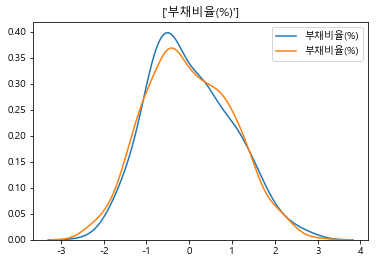

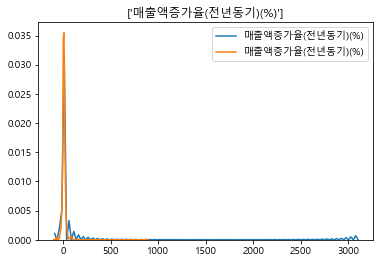

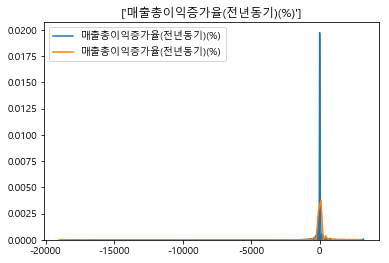

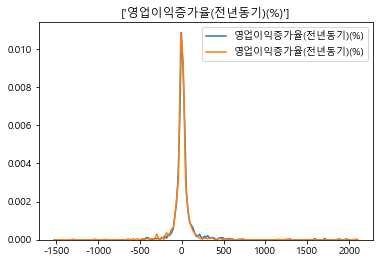

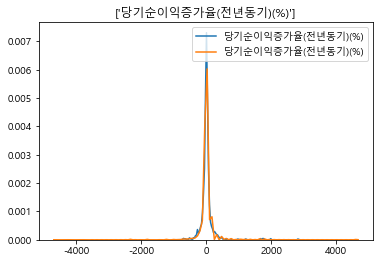

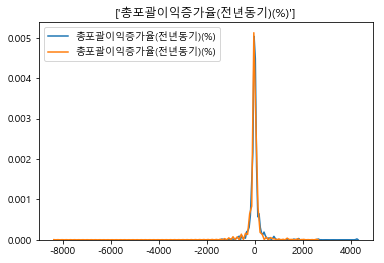

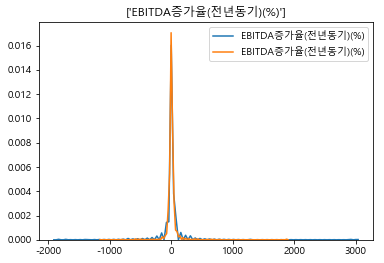

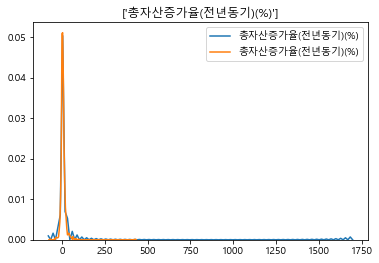

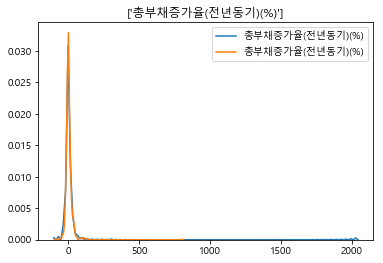

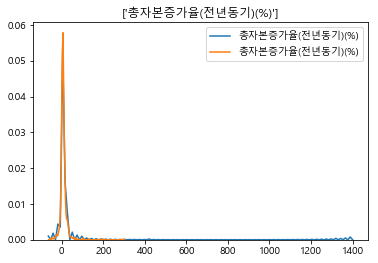

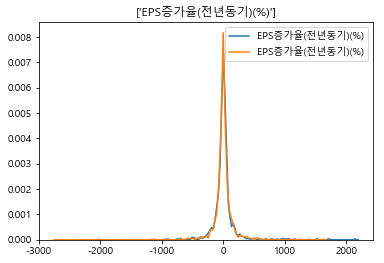

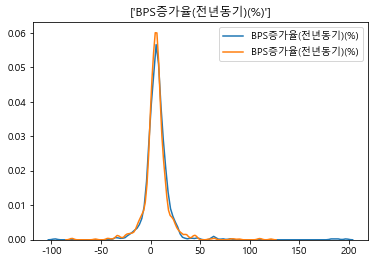

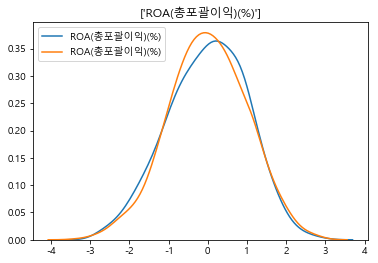

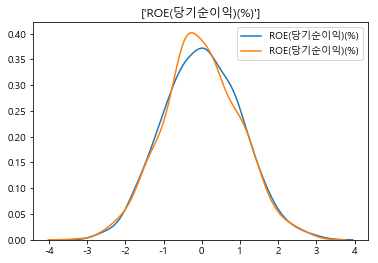

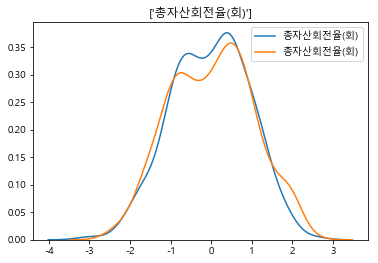

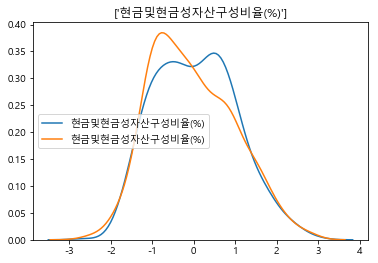

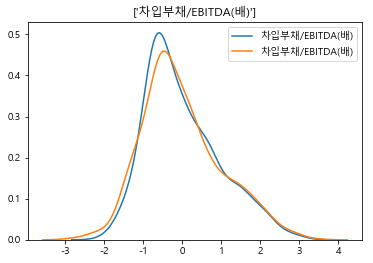

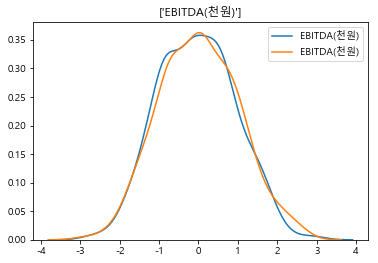

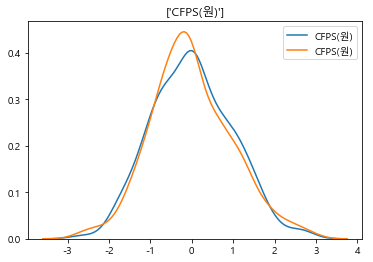

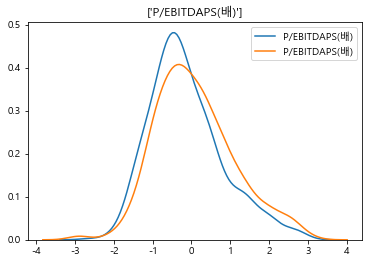

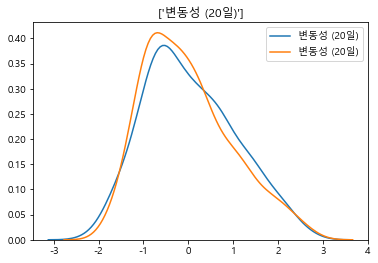

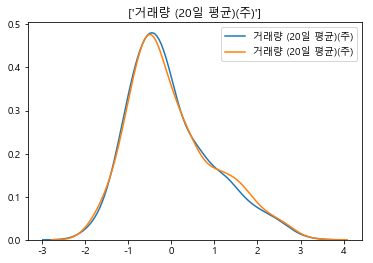

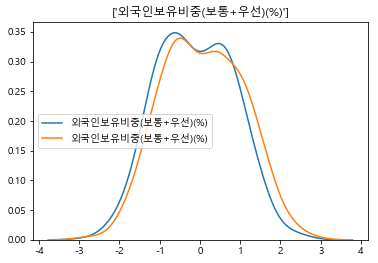

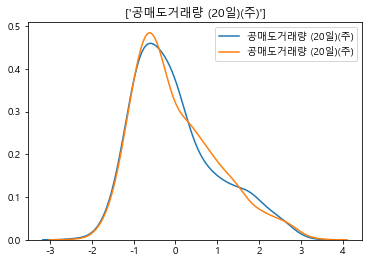

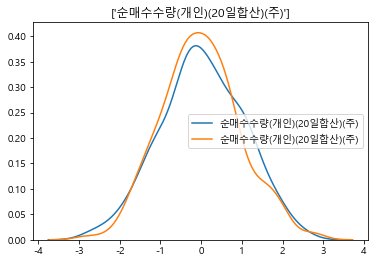

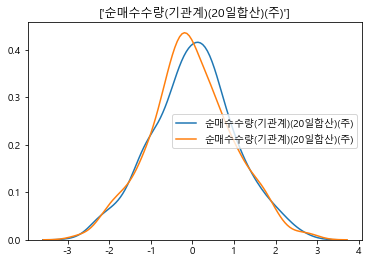

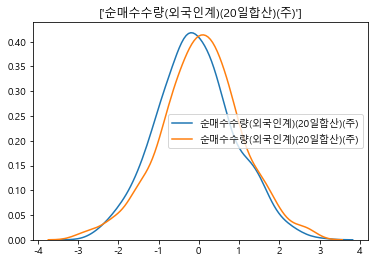

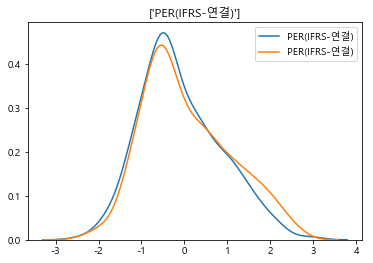

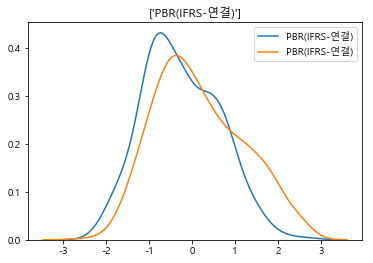

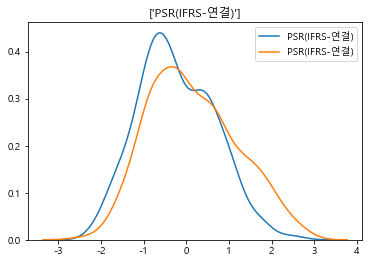

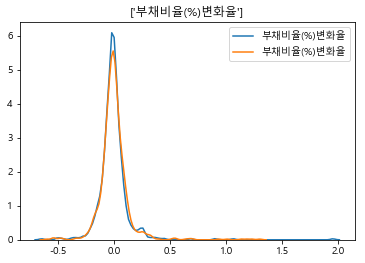

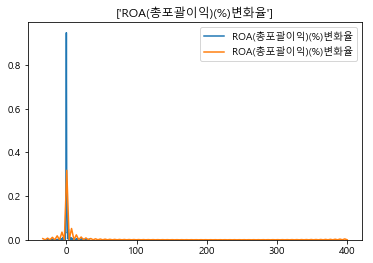

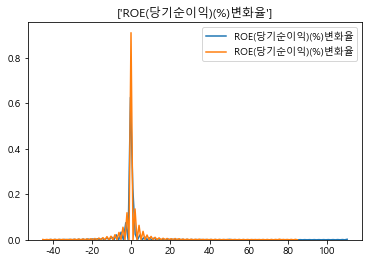

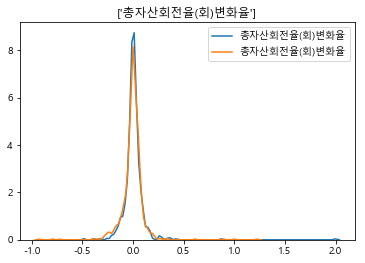

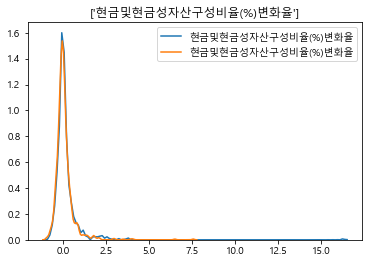

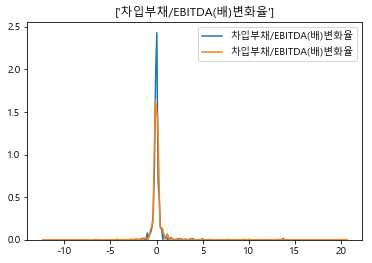

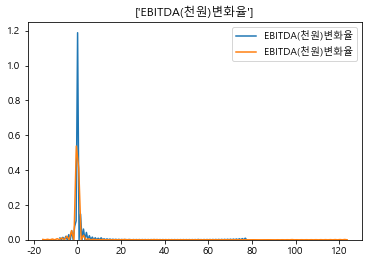

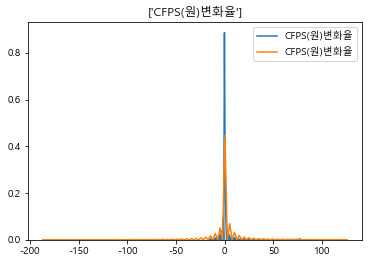

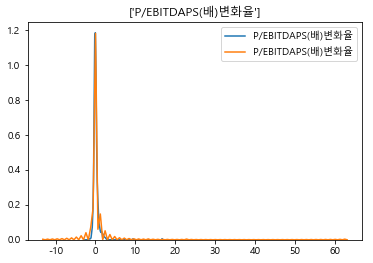

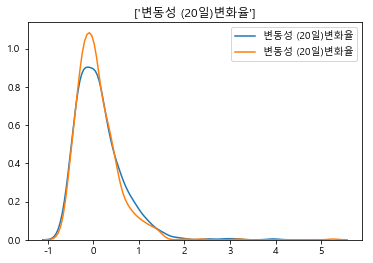

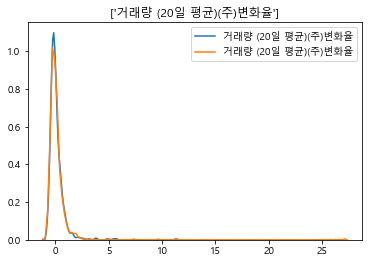

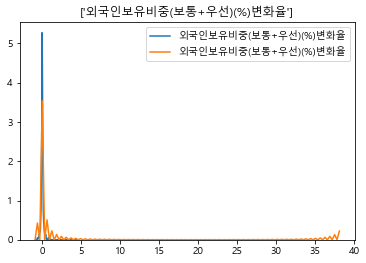

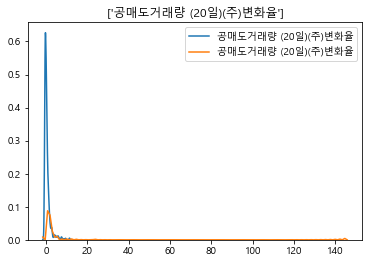

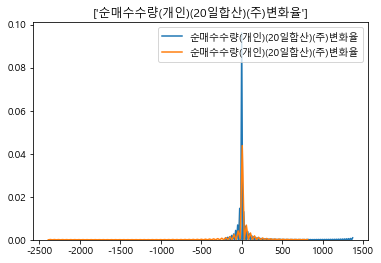

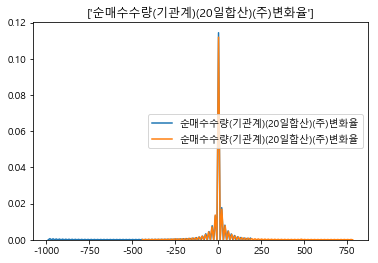

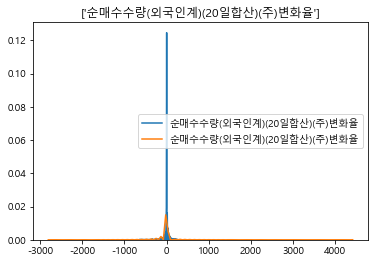

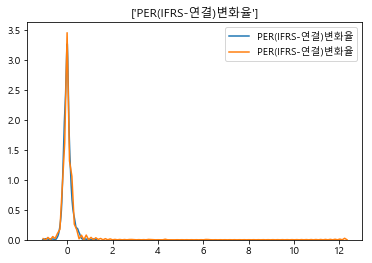

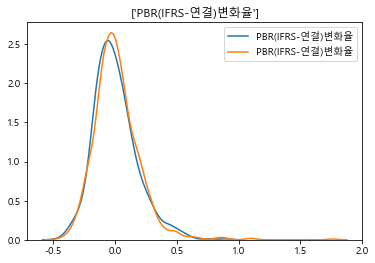

In [69]:
for i in cols[:-1]:
        sns.kdeplot(data=kospi_200_items[kospi_200_items['3개월 수익률(2)'] == 1][i])
        sns.kdeplot(data=kospi_200_items[kospi_200_items['3개월 수익률(2)'] == 0][i])
        plt.title([i])
        plt.show()       

In [12]:
import sklearn

In [28]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 6)
rfe = rfe.fit(X_train, Y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True False False  True False False
 False False False False False False False False False False  True False
  True]
[18 37 36 38 43 41 39 29 32 30 40 26 17  2  9 24 16 11 20  8  3  5 15 27
 14 19  7 34  1  1  1 33 42  1  4 22 21 28 25 12 13 10 23 35 31 44  1  6
  1]


 Modeling

In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB

0.6013513513513513
0.6373873873873874
0.6283783783783784
0.5945945945945946
0.6441441441441441
0.6351351351351351
0.6148648648648649
0.6081081081081081
0.6373873873873874
0.6509009009009009
0.6036036036036037
0.5788288288288288
0.6081081081081081
0.6013513513513513
0.5945945945945946
0.6126126126126126
0.6531531531531531
0.6171171171171171
0.5990990990990991
0.5292792792792793
0.6193693693693694
0.5945945945945946
0.6644144144144144
0.6171171171171171
0.6306306306306306
0.6081081081081081
0.6103603603603603
0.6328828828828829
0.5427927927927928
0.5112612612612613
0.5878378378378378
0.5923423423423423
0.5675675675675675
0.6058558558558559
0.6081081081081081
0.6216216216216216
0.6283783783783784
0.6328828828828829
0.6283783783783784
0.6396396396396397
0.6148648648648649
0.6328828828828829
0.6283783783783784
0.6261261261261262
0.5968468468468469
0.5540540540540541
0.5900900900900901
0.6148648648648649
0.6328828828828829


<Figure size 2880x2160 with 0 Axes>

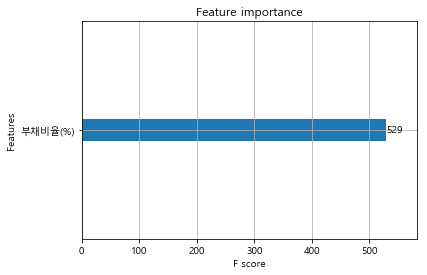

<Figure size 2880x2160 with 0 Axes>

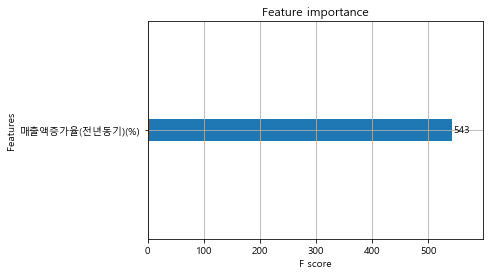

<Figure size 2880x2160 with 0 Axes>

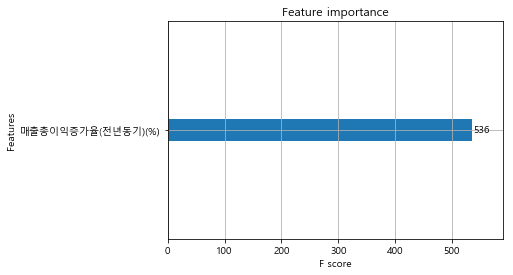

<Figure size 2880x2160 with 0 Axes>

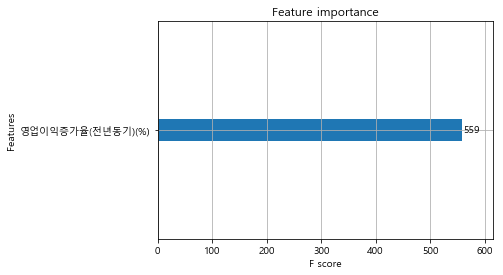

<Figure size 2880x2160 with 0 Axes>

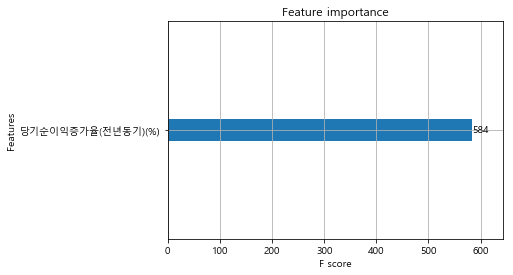

<Figure size 2880x2160 with 0 Axes>

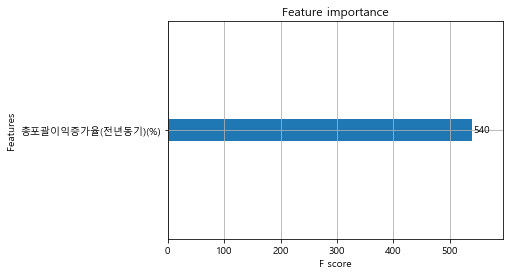

<Figure size 2880x2160 with 0 Axes>

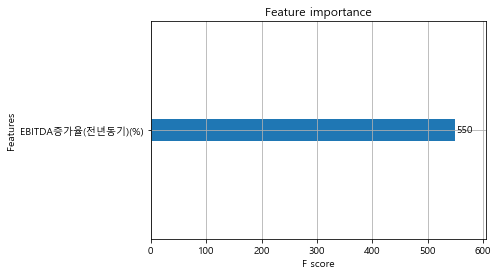

<Figure size 2880x2160 with 0 Axes>

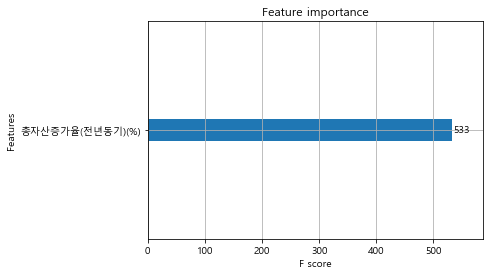

<Figure size 2880x2160 with 0 Axes>

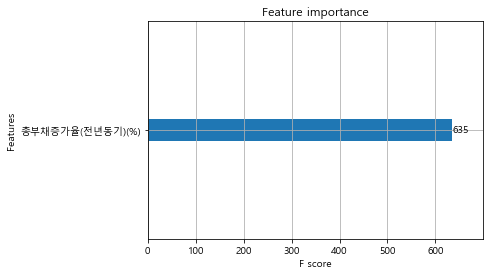

<Figure size 2880x2160 with 0 Axes>

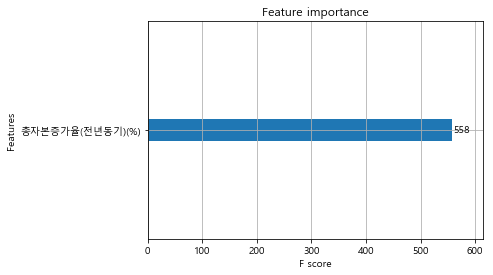

<Figure size 2880x2160 with 0 Axes>

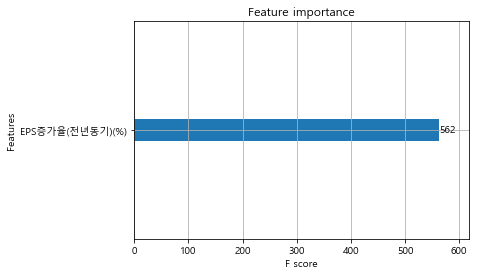

<Figure size 2880x2160 with 0 Axes>

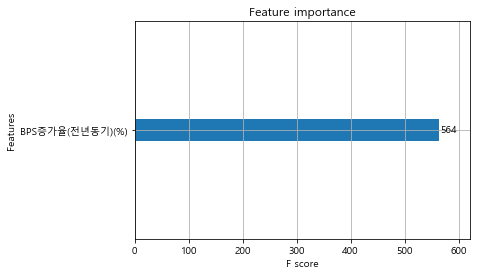

<Figure size 2880x2160 with 0 Axes>

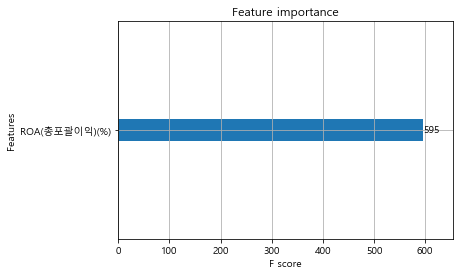

<Figure size 2880x2160 with 0 Axes>

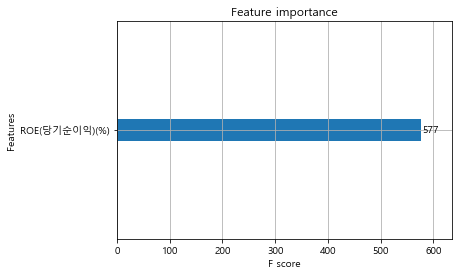

<Figure size 2880x2160 with 0 Axes>

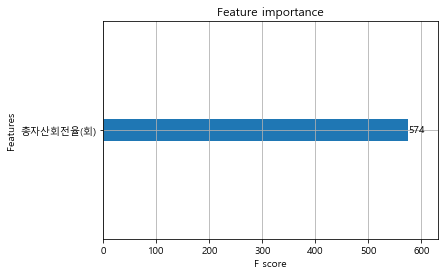

<Figure size 2880x2160 with 0 Axes>

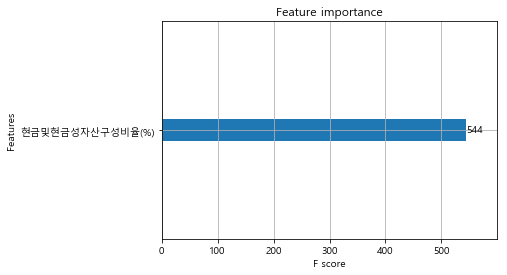

<Figure size 2880x2160 with 0 Axes>

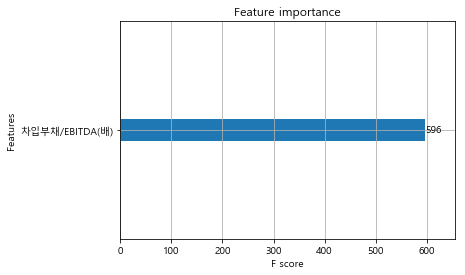

<Figure size 2880x2160 with 0 Axes>

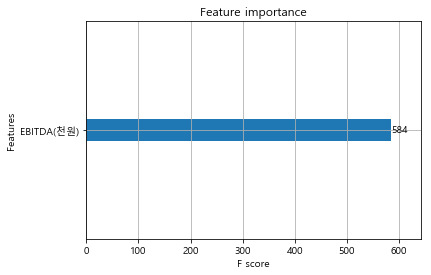

<Figure size 2880x2160 with 0 Axes>

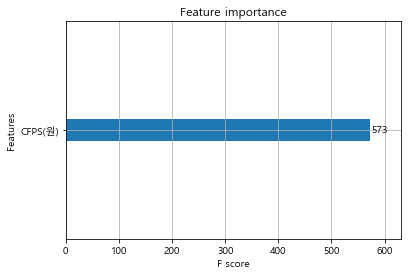

<Figure size 2880x2160 with 0 Axes>

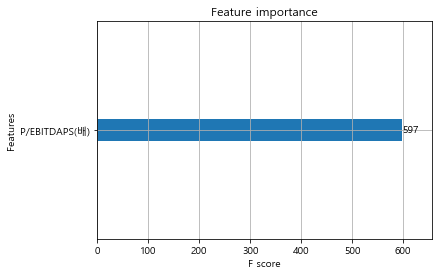

<Figure size 2880x2160 with 0 Axes>

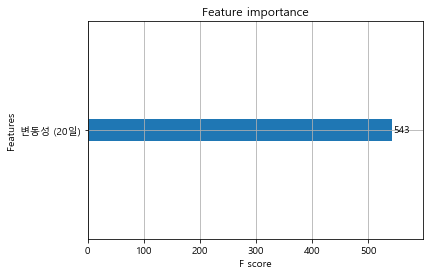

<Figure size 2880x2160 with 0 Axes>

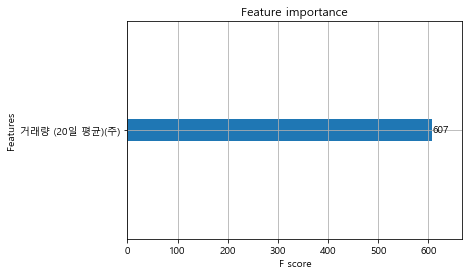

<Figure size 2880x2160 with 0 Axes>

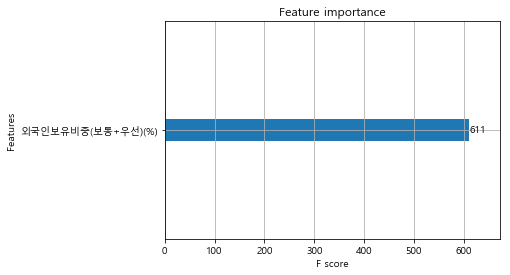

<Figure size 2880x2160 with 0 Axes>

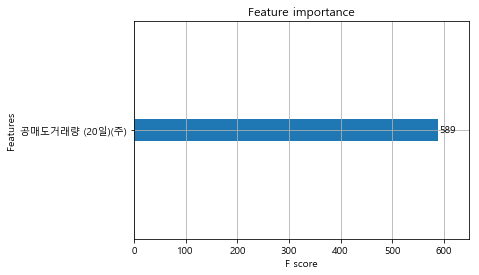

<Figure size 2880x2160 with 0 Axes>

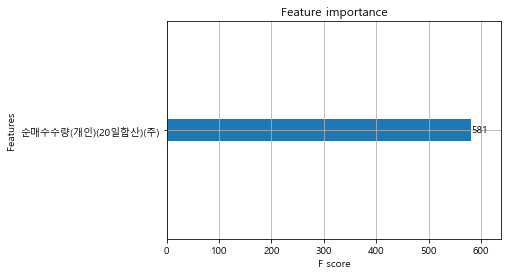

<Figure size 2880x2160 with 0 Axes>

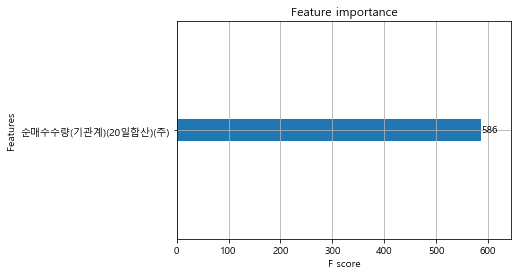

<Figure size 2880x2160 with 0 Axes>

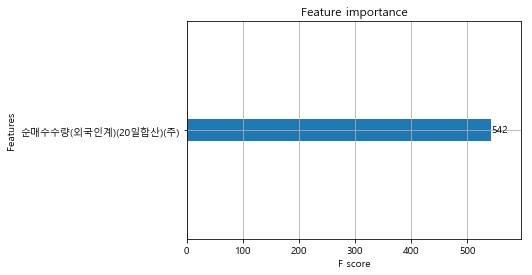

<Figure size 2880x2160 with 0 Axes>

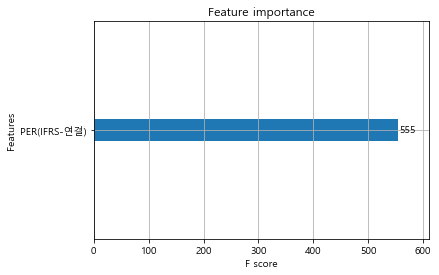

<Figure size 2880x2160 with 0 Axes>

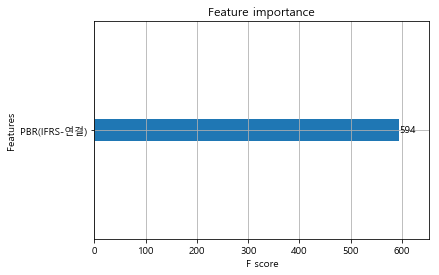

<Figure size 2880x2160 with 0 Axes>

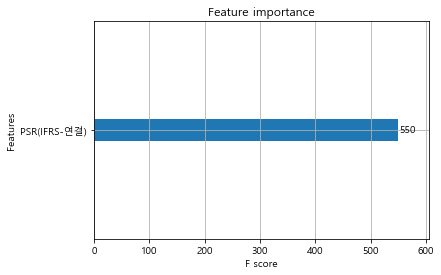

<Figure size 2880x2160 with 0 Axes>

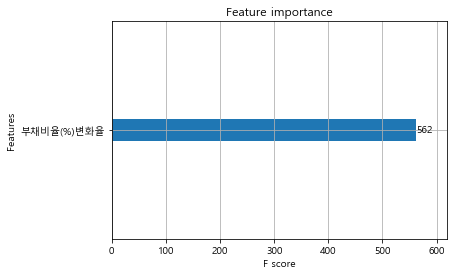

<Figure size 2880x2160 with 0 Axes>

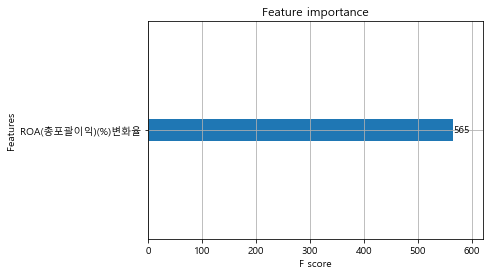

<Figure size 2880x2160 with 0 Axes>

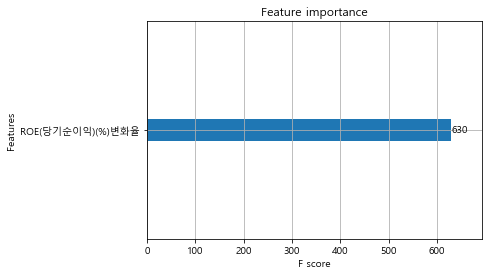

<Figure size 2880x2160 with 0 Axes>

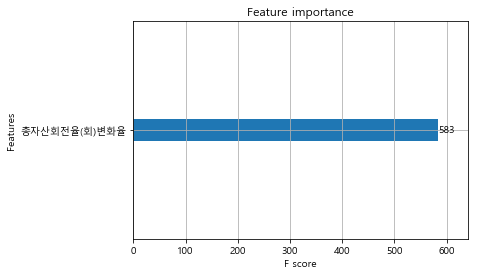

<Figure size 2880x2160 with 0 Axes>

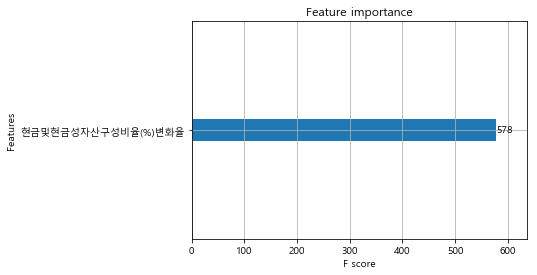

<Figure size 2880x2160 with 0 Axes>

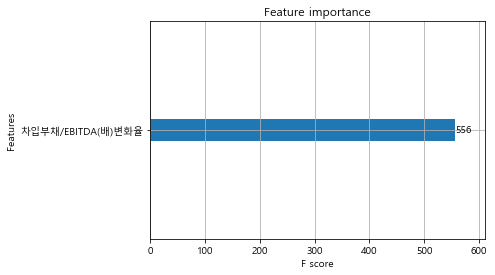

<Figure size 2880x2160 with 0 Axes>

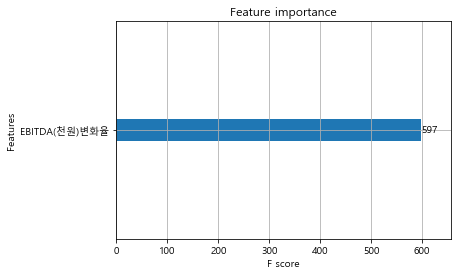

<Figure size 2880x2160 with 0 Axes>

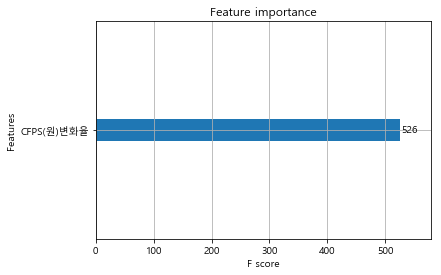

<Figure size 2880x2160 with 0 Axes>

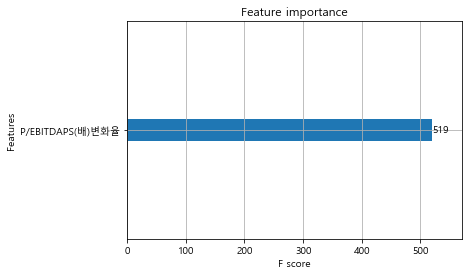

<Figure size 2880x2160 with 0 Axes>

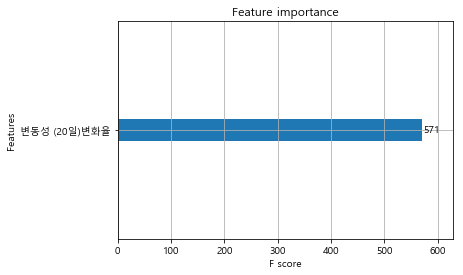

<Figure size 2880x2160 with 0 Axes>

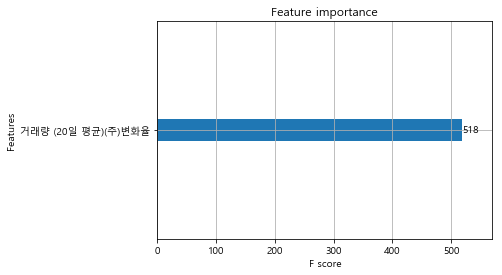

<Figure size 2880x2160 with 0 Axes>

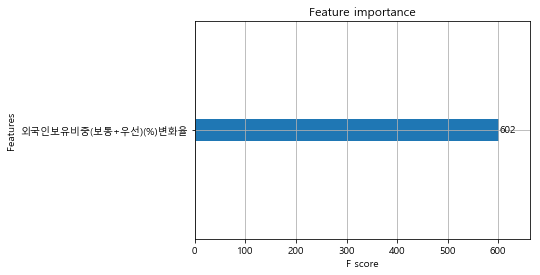

<Figure size 2880x2160 with 0 Axes>

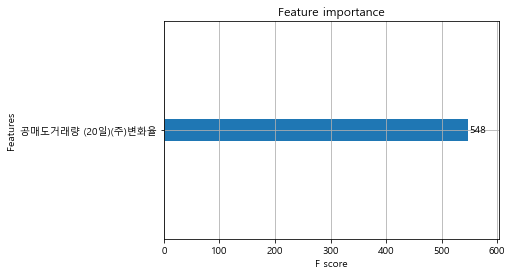

<Figure size 2880x2160 with 0 Axes>

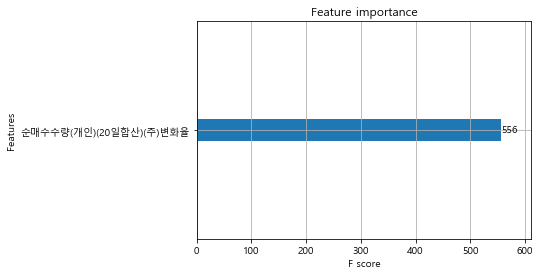

<Figure size 2880x2160 with 0 Axes>

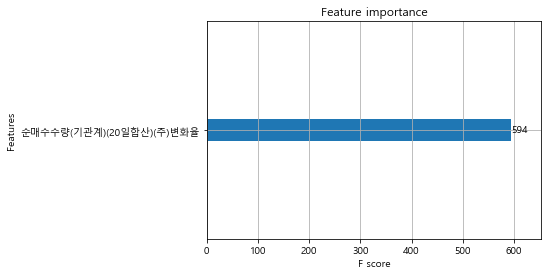

<Figure size 2880x2160 with 0 Axes>

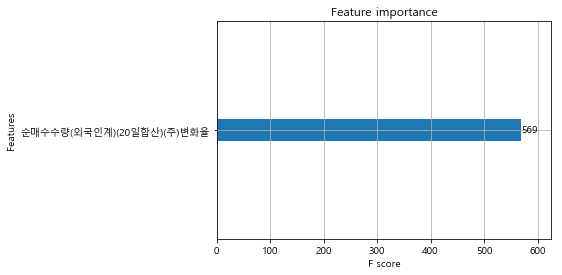

<Figure size 2880x2160 with 0 Axes>

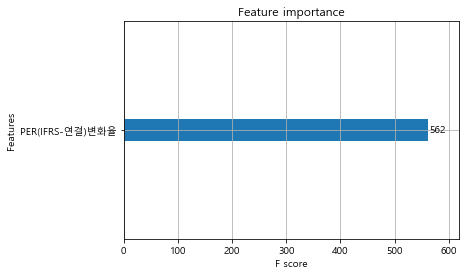

<Figure size 2880x2160 with 0 Axes>

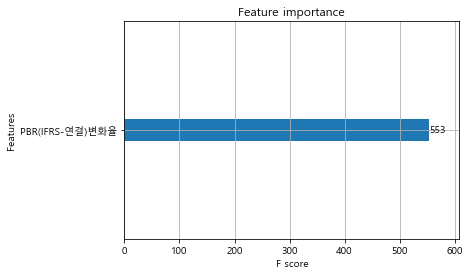

<Figure size 2880x2160 with 0 Axes>

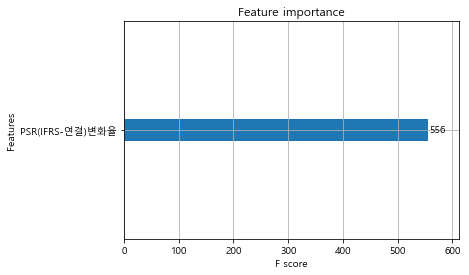

In [70]:
## train test를 X,Y 나누기
X_train = train[cols]

X_test = test[cols]

Y_train = train['3개월 수익률(2)']
Y_test = test['3개월 수익률(2)']

from numpy import loadtxt
from xgboost import  XGBClassifier
from xgboost import plot_importance
import xgboost

for name in cols:
    X_train = train[[name]]
    X_test = test[[name]]
    model = XGBClassifier()
    model.fit(X_train,Y_train)
    plt.figure(figsize=(40,30))
    plot_importance(model)
    # plt.show()
    a = model.predict(X_test)
    print(metrics.accuracy_score(a,Y_test))

In [16]:
a = model.predict(X_test)
metrics.accuracy_score(a,Y_test)

0.536036036036036

In [12]:
Y_train = train['3개월 수익률(2)']
Y_test = test['3개월 수익률(2)']

for col in cols:
    XX_train = X_train[[col]]
    XX_test = X_test[[col]]

    model=LogisticRegression()
    model.fit(XX_train,Y_train)
    prediction7=model.predict(XX_test)
    print('{}  '.format(col),'The accuracy of the LogisticRegression is',metrics.accuracy_score(prediction7,Y_test))

부채비율(%)   The accuracy of the LogisticRegression is 0.6824324324324325
매출액증가율(전년동기)(%)   The accuracy of the LogisticRegression is 0.6824324324324325
매출총이익증가율(전년동기)(%)   The accuracy of the LogisticRegression is 0.6801801801801802
영업이익증가율(전년동기)(%)   The accuracy of the LogisticRegression is 0.6779279279279279
당기순이익증가율(전년동기)(%)   The accuracy of the LogisticRegression is 0.6824324324324325
총포괄이익증가율(전년동기)(%)   The accuracy of the LogisticRegression is 0.6734234234234234
EBITDA증가율(전년동기)(%)   The accuracy of the LogisticRegression is 0.6824324324324325
총자산증가율(전년동기)(%)   The accuracy of the LogisticRegression is 0.6801801801801802
총부채증가율(전년동기)(%)   The accuracy of the LogisticRegression is 0.6801801801801802
총자본증가율(전년동기)(%)   The accuracy of the LogisticRegression is 0.6801801801801802
EPS증가율(전년동기)(%)   The accuracy of the LogisticRegression is 0.6756756756756757
BPS증가율(전년동기)(%)   The accuracy of the LogisticRegression is 0.6824324324324325
ROA(총포괄이익)(%)   The accuracy of the LogisticRegres

In [65]:
model=LogisticRegression(C=0.1)
model.fit(X_train,Y_train)
prediction7=model.predict(X_test)
print('The accuracy of the LogisticRegression is',metrics.accuracy_score(prediction7,Y_test))

The accuracy of the LogisticRegression is 0.5067567567567568


In [37]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=3)

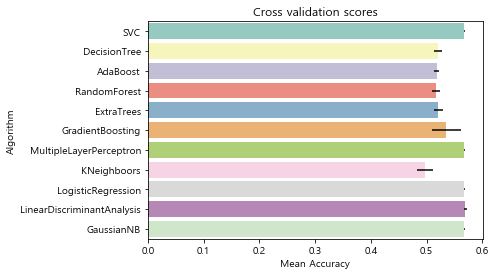

In [38]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(GaussianNB())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis",'GaussianNB']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


In [39]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('LR',LogisticRegression(C=0.05)),
                                              ('RFor',RandomForestClassifier(n_estimators=2000,random_state=0)),
                                              ('ExtC',ExtraTreesClassifier()),
                                              ('LDA', LinearDiscriminantAnalysis()),
                                              ('GBC',GradientBoostingClassifier())], 
                       voting='soft').fit(X_train,Y_train)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test,Y_test))
cross=cross_val_score(ensemble_lin_rbf,X_train,Y_train, cv = 3 ,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.5698198198198198
The cross validated score is 0.5131798867126395


더이상 진행해도 개선의 여지가 없음